<a id='import'></a>
<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        BIKE SHARING DEMAND IN LONDON
    </h1>
    </div>

<h2 align="center"><font color=#2067d4> Exploratory Data Analysis (EDA) Project</font></h2> 

---
    
<p align="right">
  <b><font color="#2067d4">Duygu Jones | Data Scientist  | May 2024</font> <font color="black"></font></b>
  <br>
  <b><font color="#2067d4">Follow me:</font> <font color="black"></font></b>
  <br>
  <a href="https://duygujones.vercel.app/">duygujones.com</a> | 
  <a href="https://www.linkedin.com/in/duygujones/">Linkedin</a> | 
  <a href="https://github.com/Duygu-Jones">GitHub</a> | 
  <a href="https://www.kaggle.com/duygujones">Kaggle</a> | 
  <a href="https://medium.com/@duygujones">Medium</a> | 
  <a href="https://public.tableau.com/app/profile/duygu.jones/vizzes">Tableau</a>
</p>


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<h3 align="left"><font color=#2067d4>Project Description</font></h3>   

- In this project, we will uncover current patterns in the data by visualizing the historical data of London bike shares using visualization tools. 
- We will perform basic Exploratory Data Analysis (EDA) on the dataset and use Seaborn and Matplotlib to visualize the bike share counts.

<h4 align="left"><font color=#2067d4>Purpose</font></h4>      
    
- The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.
- To aime to reduce traffic congestion, noise, and air pollution free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles.
    
    
<h4 align="left"><font color=#2067d4>Methodology</font></h4> 

1. **Data Cleaning:** Handle missing values, remove duplicates, and correct inconsistencies.
2. **Data Transformation:** Convert data types if necessary, create new features, and aggregate data.
3. **Descriptive Statistics:** Calculate mean, median, standard deviation, and other relevant statistics.
4. **Univariate Analysis:** Visualize the distribution of individual variables using histograms, box plots, and KDE plots.
5. **Bivariate Analysis:** Explore relationships between two variables using scatter plots, bar plots, and correlation matrices.
6. **Multivariate Analysis:** Analyze interactions between multiple variables using pair plots and heatmaps.
7. **Time Series Analysis:** Examine trends and patterns over time using line plots and seasonal decomposition.
8. **Summary and Insights:** Summarize the findings and highlight key insights from the analysis.


    
<h4 align="left"><font color=#2067d4>About the Datasets </font></h4>    
    
**Dataset:** 'store.sharing.csv'

- **Content:** The change in the number of bike shares in London according to seasons, temperature, wind speed, etc.
- **Rows:** 17414    
- **Columns:** 10 
    - **timestamp**: Timestamp field for grouping the data
    - **cnt**: The count of new bike shares
    - **t1**: Real temperature in °C
    - **t2**: Temperature in °C "feels like"
    - **hum**: Humidity in percentage
    - **wind_speed**: Wind speed in km/h
    - **weather_code**: Category of the weather
          - "weather_code" category description:
             1 = Clear; mostly clear but have some values with haze/fog/patches of fog/fog in vicinity
             2 = Scattered clouds / few clouds
             3 = Broken clouds
             4 = Cloudy
             7 = Rain/light rain shower/light rain
             10 = Rain with thunderstorm
             26 = Snowfall
             94 = Freezing fog
    - **is_holiday**: Boolean field - 1 holiday / 0 non-holiday
    - **is_weekend**: Boolean field - 1 if the day is a weekend
    - **season**: Category field meteorological seasons: 0-spring; 1-summer; 2-fall; 3-winter.
 
    
</div>


## <font color=#2067d4> <b> EXPLORATORY DATA ANALYSIS (EDA)</b><font color='orange'>

### Import The Libraries

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib as mpl  
import matplotlib.pyplot as plt 
import seaborn as sns  
import missingno as mn
%matplotlib inline 
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

### Read the Dataset

In [57]:
df0 = pd.read_csv('store_sharing.csv')
df = df0.copy()

### Summariese the Dataframe

In [17]:
from skimpy import skim

In [18]:
skim(df) # summarieses the dataFrame 

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17414  │ │ float64     │ 8     │                                                          │
│ │ Number of columns │ 10     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %   ┃ mean     ┃ sd     ┃ p0     ┃ p25   ┃ p50   ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ cnt               │    0 │      0 │     1100 │   1100 │      0 │   260 │   840 │   1700 │   7900 │   ▇▃▁   │  │
│ │ t1                │    0 │      0 │       12 │    5.6 │   -1.5 │     8 │    12 │     16 │     34 │  ▁▆▇▅▁  │  │
│ │ t2                │    0 │      0 │       12 │    6.6 │     -6 │     6 │    12 │     16 │     34 │  ▁▆▆▇▂  │  │
│ │ hum               │    0 │      0 │       72 │     14 │     20 │    63 │    74 │     83 │    100 │  ▁▃▆▇▅  │  │
│ │ wind_speed        │    0 │      0 │       16 │    7.9 │      0 │    10 │    15 │     20 │     56 │  ▅▇▅▁   │  │
│ │ weather_code      │    0 │      0 │      2.7 │    2.3 │      1 │     1 │     2 │      3 │     26 │   ▇▁    │  │
│ │ is_holiday        │    0 │      0 │    0.022 │   0.15 │      0 │     0 │     0 │      0 │      1 │    ▇    │  │
│ │ is_weekend        │    0 │      0 │     0.29 │   0.45 │      0 │     0 │     0 │      1 │      1 │ ▇    ▃  │  │
│ │ season            │    0 │      0 │      1.5 │    1.1 │      0 │     0 │     1 │      2 │      3 │ ▇ ▇ ▇▇  │  │
│ └───────────────────┴──────┴────────┴──────────┴────────┴────────┴───────┴───────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ timestamp                 │       0 │          0 │                            2 │                    34828 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### Check out the duplicated values 


In [13]:
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print("\nNumber of duplicate rows:", duplicate_rows)
    print("Duplicate Rows:")
    print(df[df.duplicated()])
else:
    print("\nNo duplicate rows found.")


No duplicate rows found.


### Check out the missing values


In [15]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [20]:
df.isnull().sum().sum()

0

### Head and Tail


In [3]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [11]:
df.tail()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


### General Info

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [17]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

### Calculate the basic statistical values

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


## <font color=#2067d4> <b> DATA VISUALIZATION </b><font color='orange'>

### Count of Bike Shares by Season

- **According to the provided graph showing the maximum and minimum bike shares by season, which season had the highest number of bike shares?**

In [5]:
df.groupby("season")["cnt"].agg([max,min,np.mean])

,max,min,mean
season,,,
0.0,5322,0,1103.831589
1.0,7860,12,1464.465238
2.0,5422,9,1178.954218
3.0,4415,10,821.729099


In [6]:
df.groupby("season")["wind_speed"].agg([max,min,np.mean])

,max,min,mean
season,,,
0.0,54.0,0.0,16.395482
1.0,43.5,0.0,15.783793
2.0,56.5,0.0,14.330428
3.0,56.0,0.0,17.127252


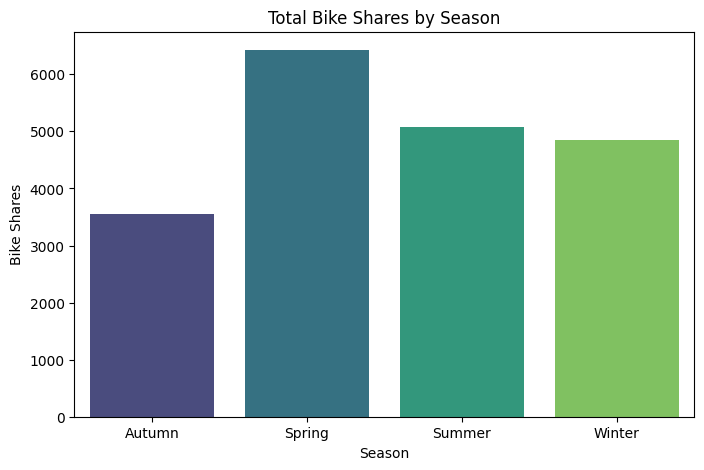

In [24]:
# Create a column for the 'season' labels
season_labels = {0: 'Winter', 1: 'Spring', 2: 'Summer', 3: 'Autumn'}
df['season_label'] = df['season'].map(season_labels)

# Aggregate bike shares by season
seasonal_data = df.groupby('season_label')['cnt'].sum().reset_index()


# Plotting bike sharing by season as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='season_label', y='cnt', data=seasonal_data, palette='viridis')
plt.xlabel('Season')
plt.ylabel('Bike Shares')
plt.title('Total Bike Shares by Season')

# y-axis labels
y_labels = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(label/1000)}' for label in y_labels])

plt.show()

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output: Total Bike Shares by Season </font>  

- Bike shares are highest in the spring season, followed by summer and winter, with autumn having the lowest bike share counts. This suggests that more favorable weather conditions in spring and summer encourage higher bike usage compared to autumn and winter.

### Distribution of Bike Shares by Season, Holiday, Weekend and Weather-code

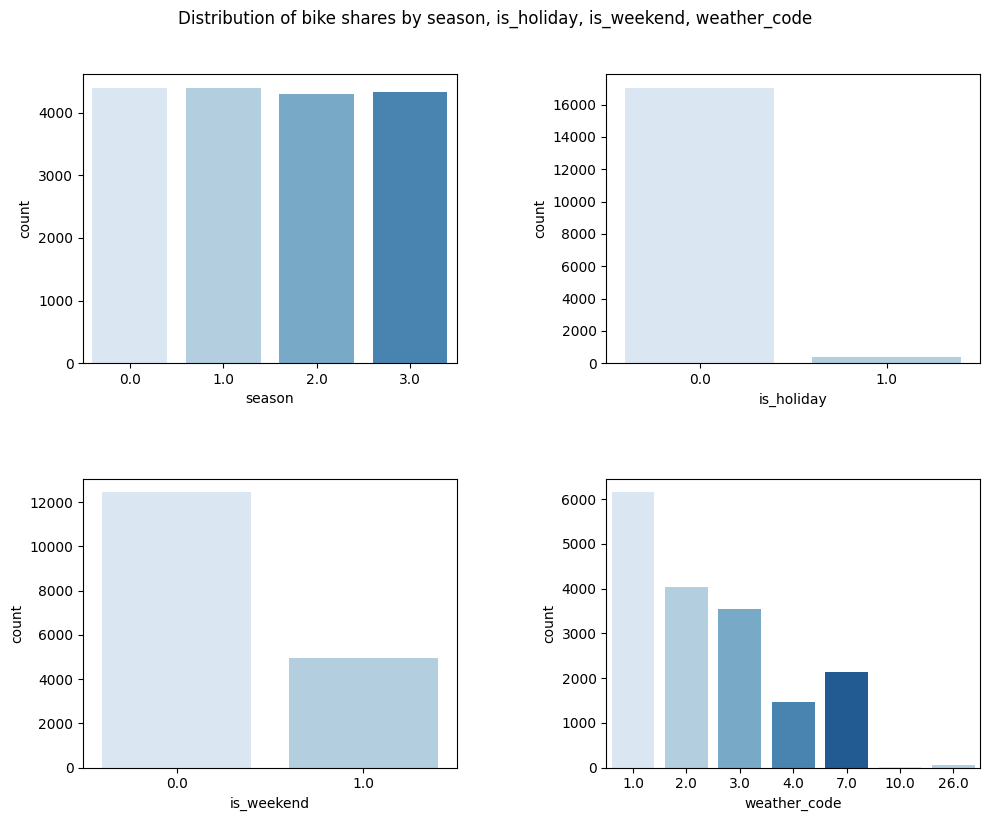

In [28]:
plt.figure(figsize=(10, 8))


plt.suptitle("Distribution of bike shares by season, is_holiday, is_weekend, weather_code", y=1.02)

#Renk paleti oluşturma (mavi tonları)
blue_palette = sns.color_palette("Blues", n_colors=5)

plt.subplot(2, 2, 1)
sns.countplot(data=df, x='season', palette=blue_palette)


plt.subplot(2, 2, 2)
sns.countplot(data=df, x='is_holiday', palette=blue_palette)


plt.subplot(2, 2, 3)
sns.countplot(data=df, x='is_weekend', palette=blue_palette)


plt.subplot(2, 2, 4)
sns.countplot(data=df, x='weather_code', palette=blue_palette)

# Add labels for weather_code
weather_code_labels = {
    1: 'Clear',
    2: 'Scattered clouds',
    3: 'Broken clouds',
    4: 'Cloudy',
    7: 'Rain',
    10: 'Thunderstorm',
    26: 'Snowfall',
    94: 'Freezing Fog'
}

#tight_layout ile alt grafikler arasındaki boşluğu ayarlama
plt.tight_layout(rect=[0, 0, 1, 1])

#subplots_adjust ile grafikler arasındaki boşluğu artırma
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output: Distribution of Bike Shares by Season, Holiday, Weekend and Weather-code </font>  
 
1. **Season**: The distribution of bike shares is fairly consistent across all seasons.
2. **Holiday**: Most bike shares occur on non-holidays, with very few on holidays.
3. **Weekend**: Bike shares are significantly higher on weekdays compared to weekends.
4. **Weather Code**: Bike shares are highest in clear weather conditions and decrease as weather conditions worsen, with the lowest counts during snowfall and freezing fog.

### Correlation Matrix of All Columns -Heatmap

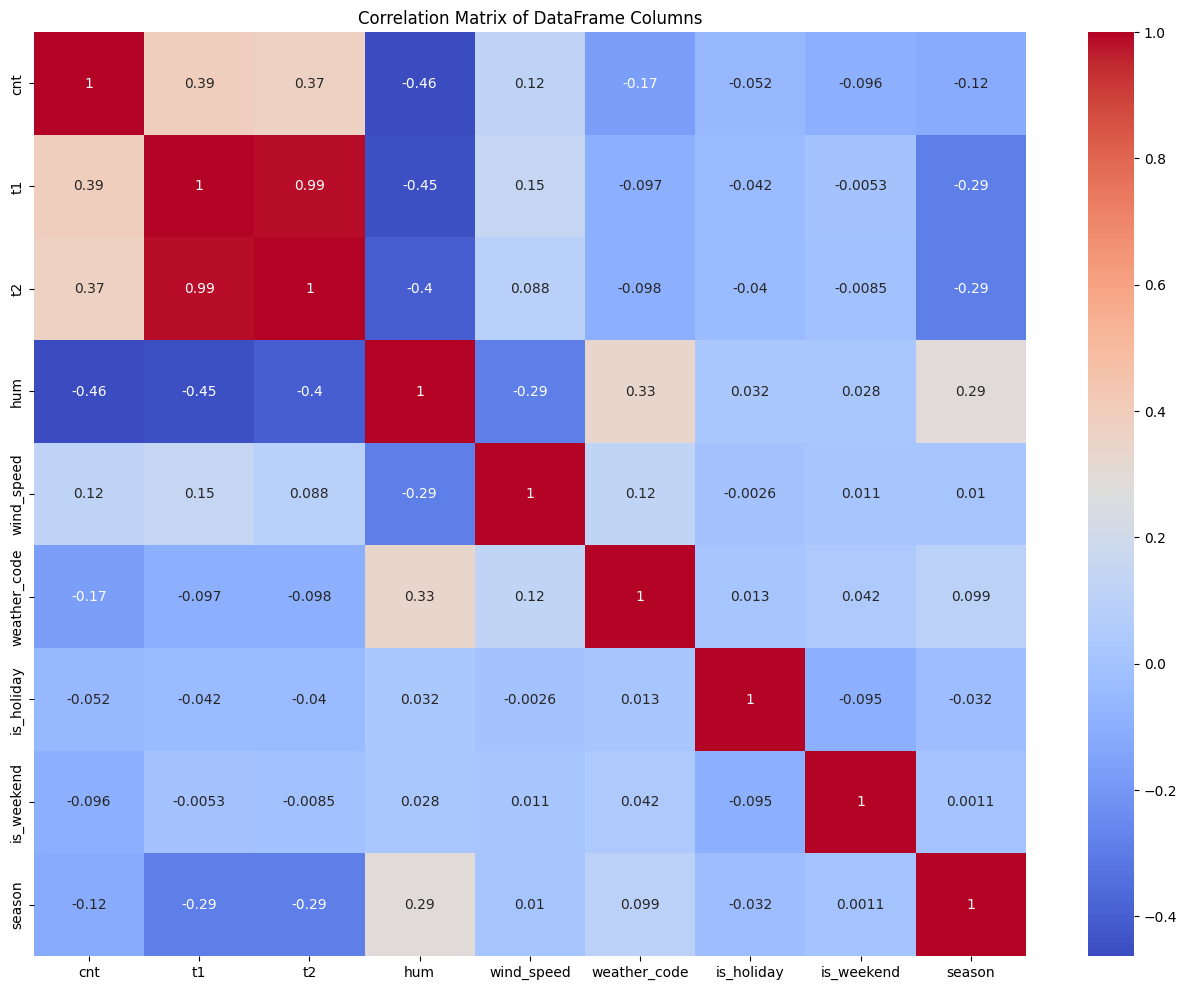

In [40]:
df_numeric = pd.get_dummies(df, columns=["year-month", "day_of_name"])

# Korelasyon matrisini hesaplayalım
correlation_matrix = df.iloc[:,0:9].corr()


# Korelasyon matrisini görselleştirelim
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of DataFrame Columns')
plt.show()

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output:  Correlation with the Heatmap.</font>  

1. **Bike Shares (cnt) and Temperature (t1, t2)**:
   - There is a moderate positive correlation between `cnt` and `t1` (0.39) and `cnt` and `t2` (0.37). This suggests that bike shares increase as temperatures rise.

2. **Bike Shares (cnt) and Humidity (hum)**:
   - There is a moderate negative correlation between `cnt` and `hum` (-0.46), indicating that higher humidity levels are associated with fewer bike shares.

3. **Humidity (hum) and Weather Code (weather_code)**:
   - Humidity has a moderate positive correlation with the weather code (0.33), suggesting that certain weather conditions, like rain or fog, are associated with higher humidity levels. 

6. **Temperature (t1, t2) and Humidity (hum)**:
   - There is a moderate negative correlation between temperature (t1, t2) and humidity (-0.45 and -0.4 respectively), indicating that higher temperatures are generally associated with lower humidity.

### Negatife and Positive Correlation of Bike Share(cnt) vs other Columns

#### Heatmap: Correlation of Bike Share(cnt) vs other Columns 

<Axes: >

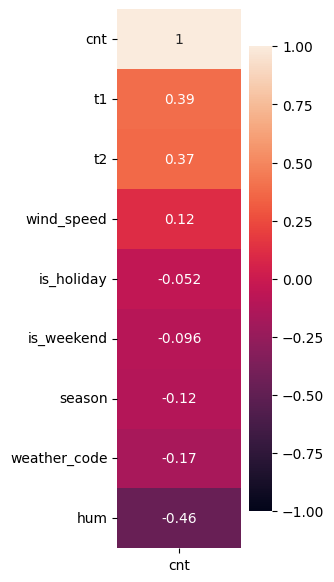

In [42]:
plt.figure(figsize=(2,7))
sns.heatmap(df_corr_cnt, annot=True, vmin=-1, vmax=1)

####  BarPlot: Correlation of Bike Share(cnt) vs other Columns 

<Figure size 1000x600 with 0 Axes>

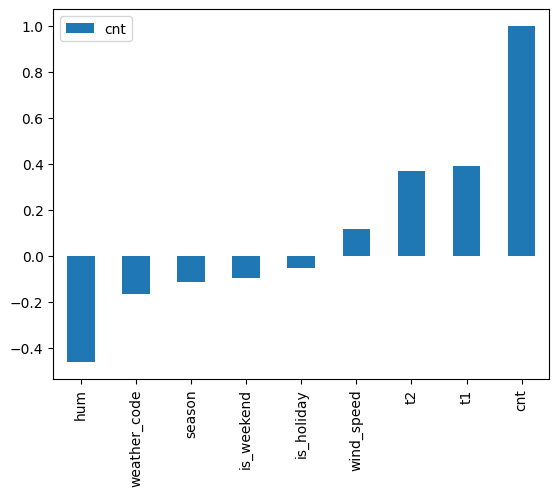

In [31]:
plt.figure(figsize=(10,6))

df.iloc[:,0:9].corr()[["cnt"]].sort_values(by="cnt").plot.bar();

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output:  Correlation of Bike Share(cnt) vs other Columns</font>  
 
    
1. **Positive Correlations with Bike Shares (cnt)**:
   - **Temperature (t1)**: Moderate positive correlation (0.39) suggests that bike shares increase as the real temperature rises.
   - **Feels-like Temperature (t2)**: Moderate positive correlation (0.37) suggests that bike shares increase as the feels-like temperature rises.
   - **Wind Speed**: Weak positive correlation (0.12) indicates a slight increase in bike shares with higher wind speeds.

2. **Negative Correlations with Bike Shares (cnt)**:
   - **Humidity (hum)**: Moderate negative correlation (-0.46) indicates that bike shares decrease as humidity increases.
   - **Weather Code**: Weak negative correlation (-0.17) suggests that adverse weather conditions slightly reduce bike shares.
   - **Season**: Weak negative correlation (-0.12) indicates that bike shares are somewhat lower in certain seasons.
   - **Weekend (is_weekend)**: Weak negative correlation (-0.096) indicates fewer bike shares on weekends.
   - **Holiday (is_holiday)**: Very weak negative correlation (-0.052) suggests slightly fewer bike shares on holidays.

 ### Distribution of Bike Shares Over the Time


- **Look at the data type of each variable, transform timestamp in date type, and set it as index.**


In [64]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [65]:
#convert the 'timestamp' column to a datetime format

df.timestamp = pd.to_datetime(df.timestamp)

In [66]:
#set the index

df.set_index("timestamp", inplace=True)
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [67]:
# Check the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


- **Feature engineering: Extract new columns (day of the week, day of the month, hour, month, season, year etc.)**

In [68]:
df["year-month"] = df.index.strftime("%Y-%m")  # Extracts year and month in YYYY-MM format
df["year"] = df.index.year                     # Extracts the year
df["month"] = df.index.month                   # Extracts the month
df["day_of_month"] = df.index.day              # Extracts the day of the month
df["day_of_week"] = df.index.dayofweek         # Extracts the day of the week as an integer (0=Monday, 6=Sunday)
df["day_of_name"] = df.index.day_name()        # Extracts the day name (e.g., Monday, Tuesday)
df["hour"] = df.index.hour                     # Extracts the hour


In [69]:
#check the dataframe

df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year-month,year,month,day_of_month,day_of_week,day_of_name,hour
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,4


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
 9   year-month    17414 non-null  object 
 10  year          17414 non-null  int64  
 11  month         17414 non-null  int64  
 12  day_of_month  17414 non-null  int64  
 13  day_of_week   17414 non-null  int64  
 14  day_of_name   17414 non-null  object 
 15  hour          17414 non-null  int64  
dtypes: float64(8), int64(6), object(2)
memory usage: 2.3+ MB


 #### Bike shares by years 

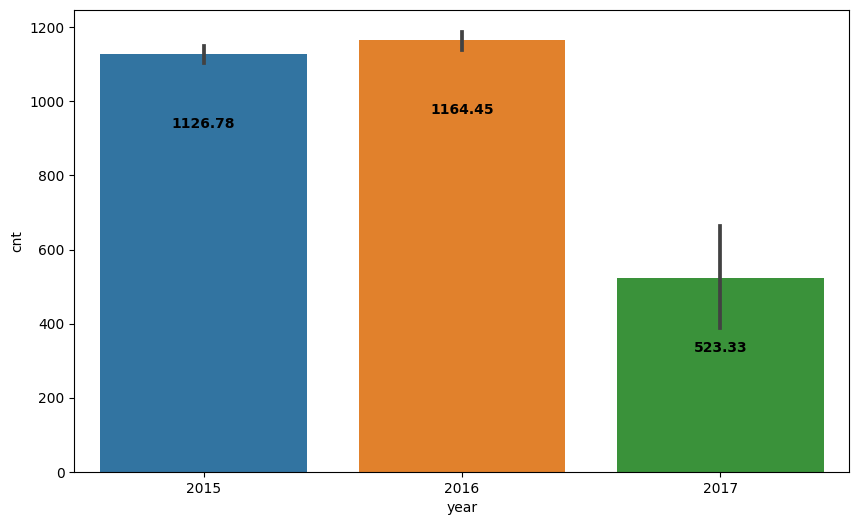

In [65]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df, x="year", y="cnt")
for p in ax.patches:
    ax.annotate(round(p.get_height(), 2), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0,-50), textcoords='offset points',fontweight='bold')

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output:Plot bike shares by years </font>  

- The average bike shares were highest in 2016, followed by 2015, with a significant drop in 2017. This suggests a peak in bike sharing activity in 2016, followed by a sharp decline the next year.

 #### Bike shares by years-months

In [46]:
df["year-month"] = df.index.strftime("%Y-%m")

In [47]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year-month,year,month,day_of_month,day_of_week,day_of_name,hour
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,4


In [48]:
df_sum = pd.DataFrame(df.groupby("year-month").cnt.sum())
df_sum

,cnt
year-month,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


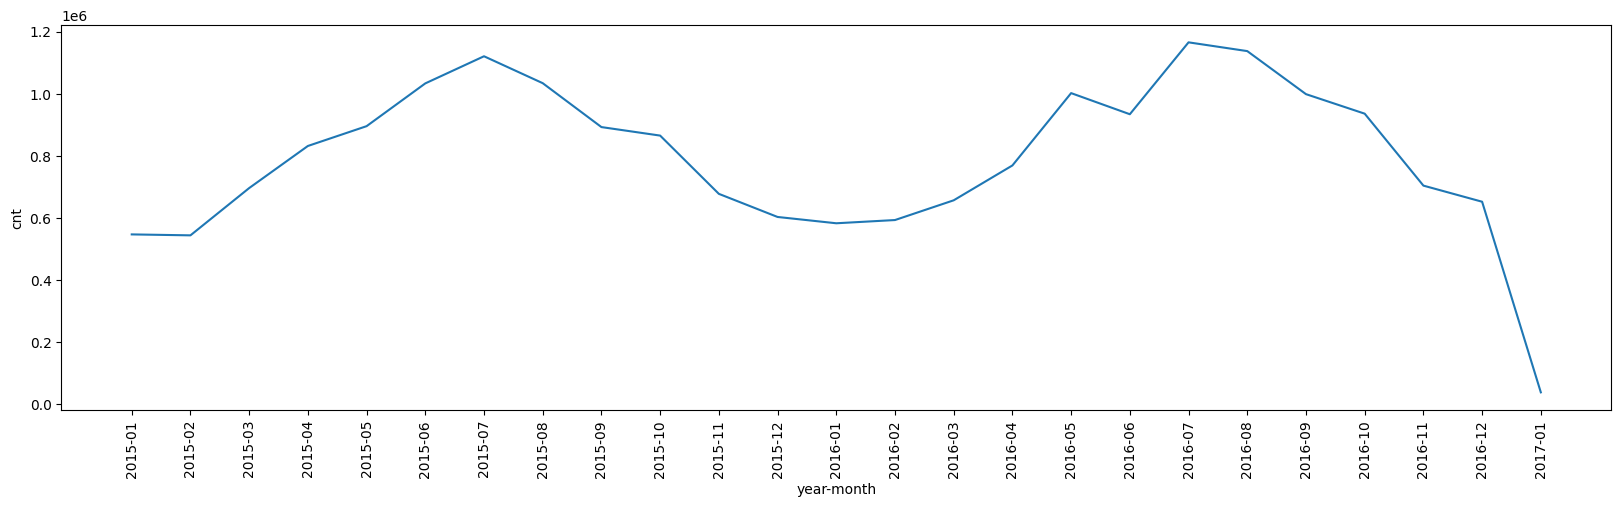

In [49]:
plt.figure(figsize=(20,5))
sns.lineplot(x="year-month",y="cnt", data = df_sum);
plt.xticks(rotation=90);

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output: Bike shares over time by year-month (lineplot).</font>  
    
- The data shows seasonal peaks in bike shares during summer (June to August) and declines in winter (December to February). 
- Bike shares increased slightly from 2015 to 2016 but dropped significantly at the beginning of 2017, likely due to external factors or incomplete data. 
- Overall, bike sharing is influenced by warmer weather, with higher usage in summer.

 #### Bike shares by months 

In [46]:
df_sum_2 = pd.DataFrame(df.groupby("month").cnt.sum())
df_sum_2

,cnt
month,
1,1166837
2,1136504
3,1352461
4,1600427
5,1897348
6,1967130
7,2286214
8,2171265
9,1891097


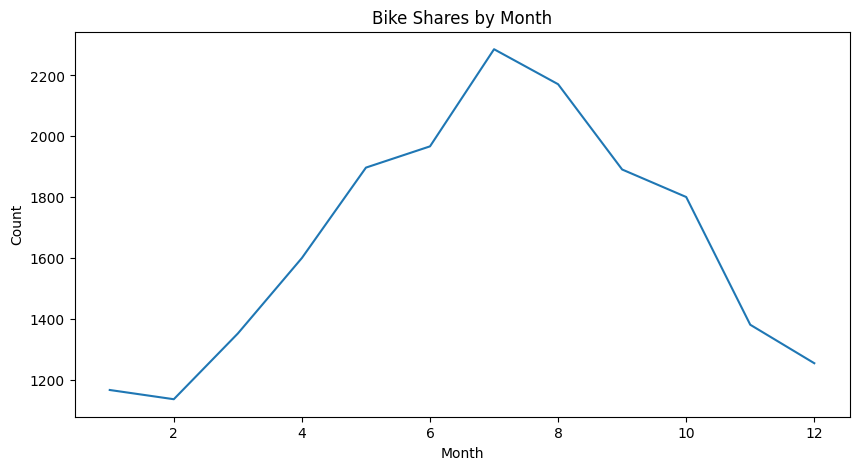

In [49]:
from matplotlib.ticker import FuncFormatter

# Function to format the y-axis labels
def thousands_formatter(x, pos):
    return f'{int(x/1000)}'

plt.figure(figsize=(10, 5))
ax = sns.lineplot(x="month", y="cnt", data=df_sum_2)

# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Bike Shares by Month")
plt.show()


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output: Bike shares over time by year-month (lineplot).</font>  
    
- The data shows seasonal peaks in bike shares during summer (June to August) and declines in winter (December to February). 
- Bike shares increased slightly from 2015 to 2016 but dropped significantly at the beginning of 2017, likely due to external factors or incomplete data. 
- Overall, bike sharing is influenced by warmer weather, with higher usage in summer.

 #### Bike shares by week with seasons

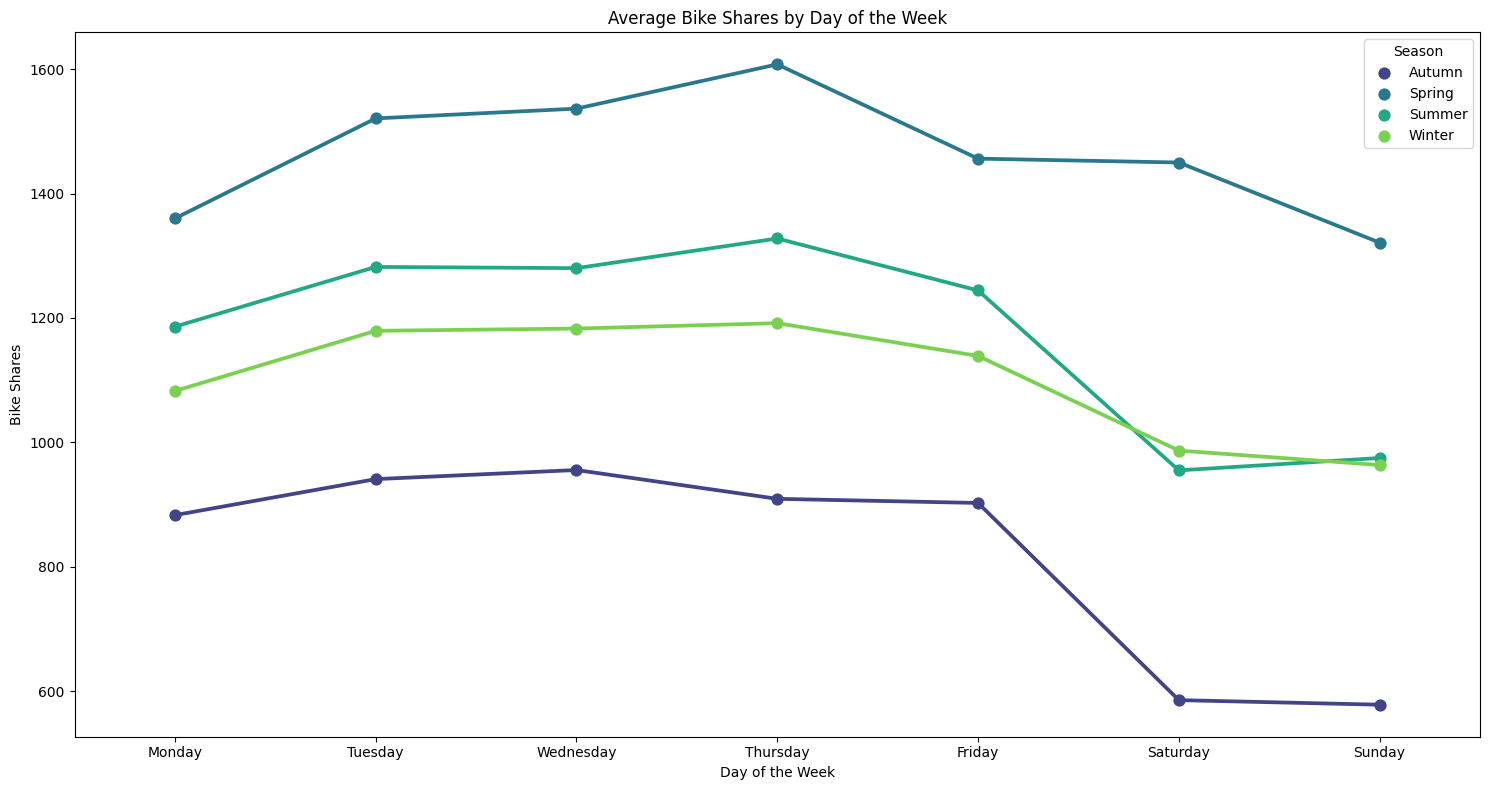

In [51]:
# Create a column for the 'season' labels
season_labels = {0: 'Winter', 1: 'Spring', 2: 'Summer', 3: 'Autumn'}
df['season_label'] = df['season'].map(season_labels)

#Aggregating the data by season and day of the week
daily_seasonal_data = df.groupby(['season_label', 'day_of_week'])['cnt'].mean().reset_index()

# Define labels for the days of the week
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Creating the pointplot for each season showing bike sharing over days of the week
plt.figure(figsize=(15, 8))

# Plot for each season separately
sns.pointplot(x='day_of_week', y='cnt', hue='season_label', data=daily_seasonal_data, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Bike Shares')
plt.title('Average Bike Shares by Day of the Week')

# Update the x-axis labels to show the days of the week
plt.xticks(ticks=range(7), labels=day_labels)

plt.legend(title='Season')
plt.tight_layout()
plt.show()

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output:Average Bike Shares by Day of the Week.</font>  

- **Weekday Peaks**: Highest bike shares on weekdays, especially Wednesday to Friday.
- **Weekend Drop**: Significant decrease in bike shares on Saturday and Sunday.
- **Seasonal Variation**: Summer and Spring have the highest bike shares; Winter has the lowest.
- **Consistent Trend**: Similar patterns across all seasons with higher usage on weekdays and lower on weekends.

 #### Bike shares by hours

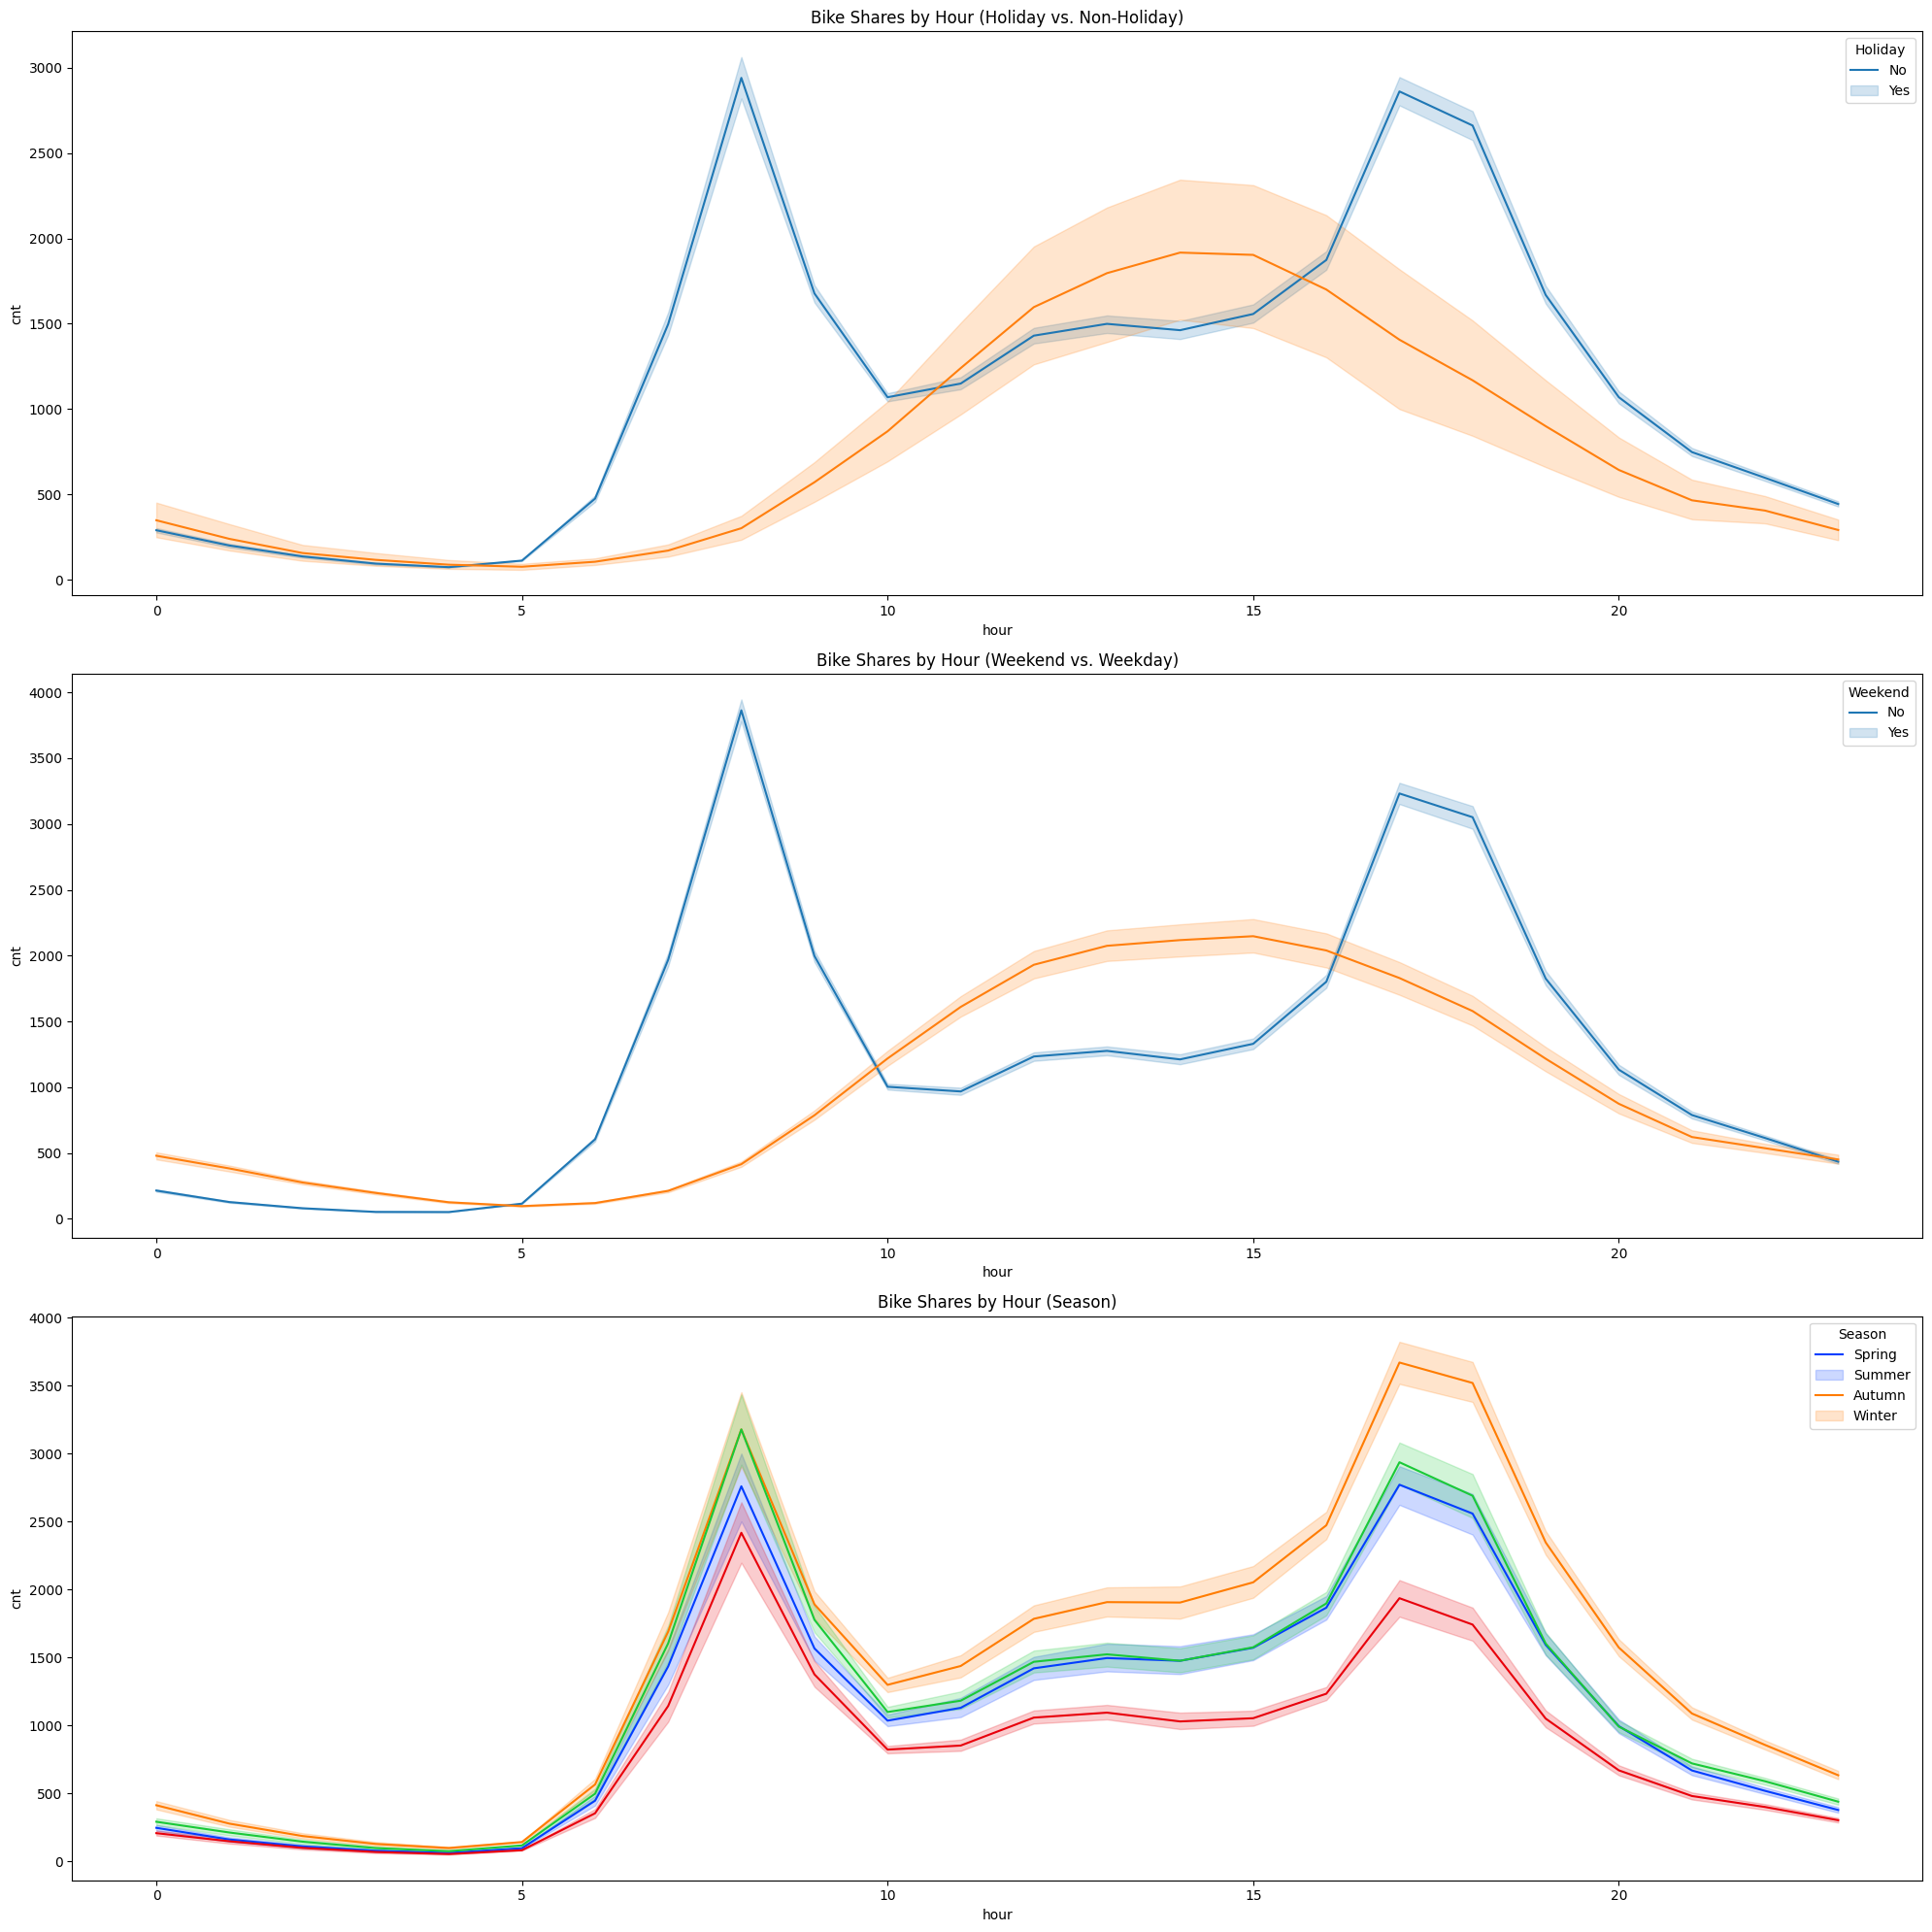

In [73]:
# Plotting
fig, ax = plt.subplots(3, 1, figsize=(20, 20))

# Plot for is_holiday
sns.lineplot(data=df, x="hour", y="cnt", hue="is_holiday", ax=ax[0])
ax[0].set_title("Bike Shares by Hour (Holiday vs. Non-Holiday)")
ax[0].legend(title="Holiday", labels=["No", "Yes"])

# Plot for is_weekend
sns.lineplot(data=df, x="hour", y="cnt", hue="is_weekend", ax=ax[1])
ax[1].set_title("Bike Shares by Hour (Weekend vs. Weekday)")
ax[1].legend(title="Weekend", labels=["No", "Yes"])

# Plot for season
sns.lineplot(data=df, x="hour", y="cnt", hue="season", palette="bright", ax=ax[2])
ax[2].set_title("Bike Shares by Hour (Season)")
ax[2].legend(title="Season", labels=["Spring", "Summer", "Autumn", "Winter"])

plt.tight_layout()
plt.show()

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output: Plot bike shares by hours on (holidays, weekend, season). </font>  

- **Morning and Evening Peaks**: Bike shares peak around 8 AM and 5 PM, indicating high usage during commute hours.
- **Weekdays vs. Weekends**: Weekdays have higher bike shares in the morning and evening compared to weekends.
- **Holidays**: Bike shares are lower on holidays compared to non-holidays.
- **Seasonal Trends**: Bike shares are highest in Spring and Summer, and lowest in Winter.

#### Distribution of bike shares by weekday/weekend

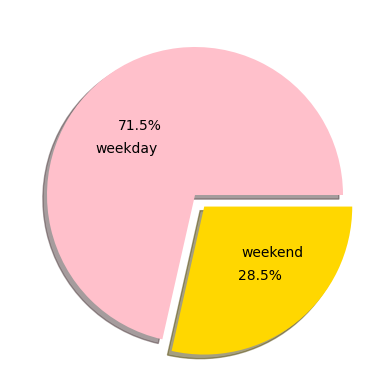

In [67]:
fig, ax = plt.subplots(figsize=(5,4)) 

colors_list = ["pink", "gold"]
explode_list = [0, 0.1]

ax.pie(df.is_weekend.value_counts().values,
       labels=["weekday", "weekend"],
       labeldistance=0.4,
       autopct="%.1f%%", shadow=True, 
       colors=colors_list, explode=explode_list)


plt.tight_layout()

plt.show()

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output: Distribution of bike shares by weekday/weekend. </font>  

- The pie chart shows that bike shares are significantly higher on weekdays, making up 71.5% of the total usage.
- On weekends, bike shares account for only 28.5% of the total usage.
- This suggests that people predominantly use bike shares for commuting purposes during the workweek rather than for leisure or other activities on weekends.

 ### Temperature and Weather Conditions

#### Overview of the Weather in London

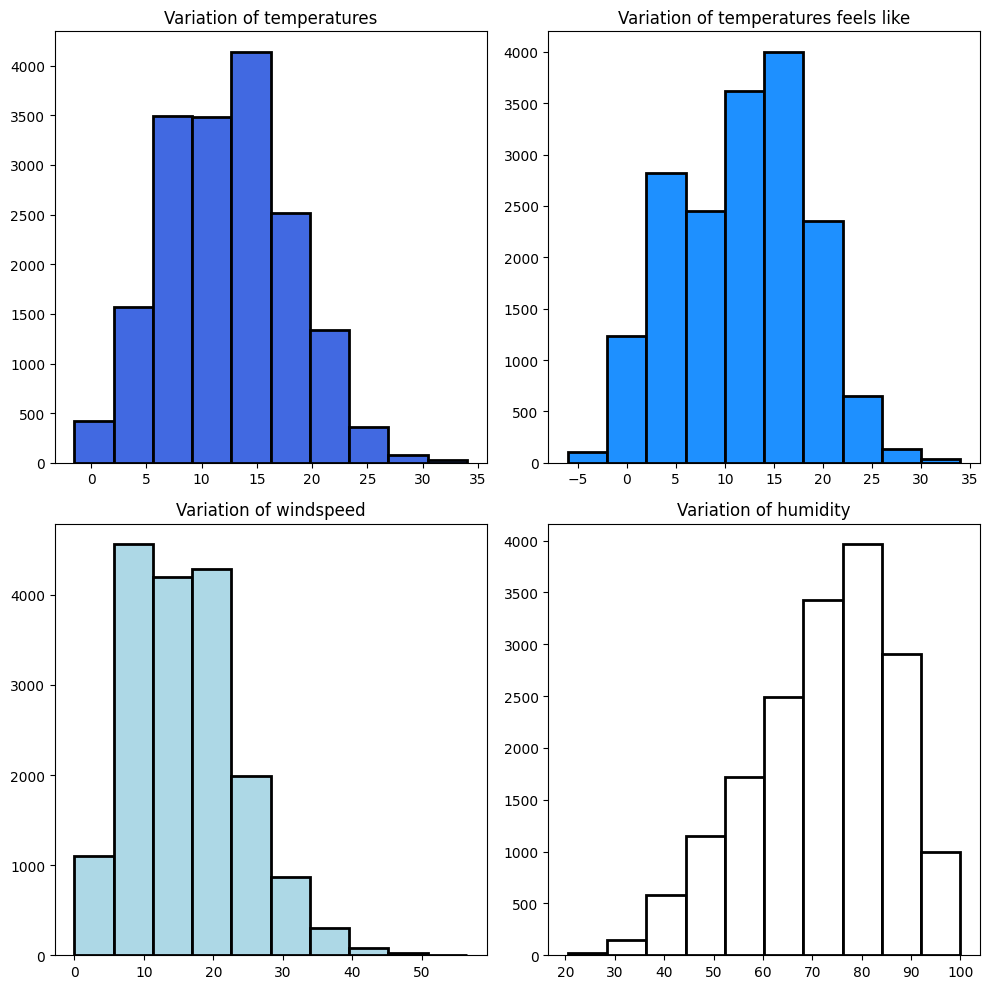

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Histogram for t1
axes[0, 0].hist(x="t1", data=df, edgecolor="black", linewidth=2, color='royalblue')
axes[0, 0].set_title("Variation of temperatures")

# Histogram for t2
axes[0, 1].hist(x="t2", data=df, edgecolor="black", linewidth=2, color='dodgerblue')
axes[0, 1].set_title("Variation of temperatures feels like")

# Histogram for wind speed
axes[1, 0].hist(x="wind_speed", data=df, edgecolor="black", linewidth=2, color='lightblue')
axes[1, 0].set_title("Variation of windspeed")

# Histogram for humidity
axes[1, 1].hist(x="hum", data=df, edgecolor="black", linewidth=2, color='white')
axes[1, 1].set_title("Variation of humidity")

plt.tight_layout()
plt.show()


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output: </font>  
 
-  Temperature frequency peaks around 15 degrees Celsius.
-  Feels-like temperature frequency is highest around 15 degrees Celsius.
-  Wind speed frequency is highest in the 5-10 km/h range.
-  Humidity frequency increases up to 80% and then decreases.

#### Bike Shares vs. Weather Conditions by Season

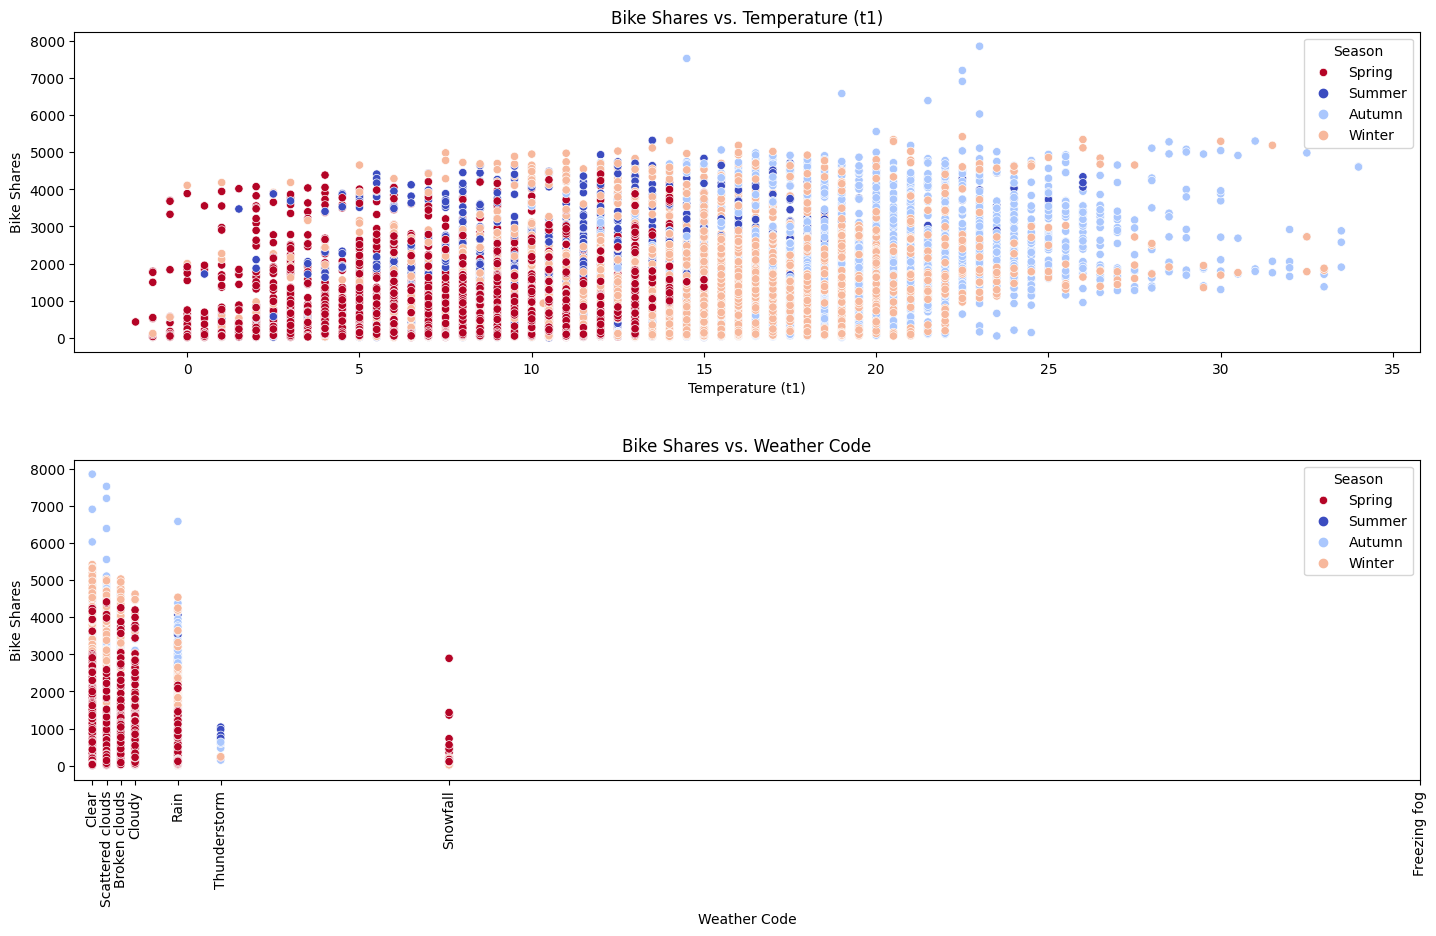

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Scatter plot for t1 vs. cnt
sns.scatterplot(x="t1", y="cnt", hue="season", data=df, ax=ax[0], palette="coolwarm")
ax[0].set_title("Bike Shares vs. Temperature (t1)")
ax[0].set_xlabel("Temperature (t1)")
ax[0].set_ylabel("Bike Shares")
season_legend_labels = ['Spring', 'Summer', 'Autumn','Winter']
ax[0].legend(title="Season", labels=season_legend_labels)

# Scatter plot for weather_code vs. cnt
sns.scatterplot(x="weather_code", y="cnt", hue="season", data=df, ax=ax[1], palette="coolwarm")
ax[1].set_title("Bike Shares vs. Weather Code")
ax[1].set_xlabel("Weather Code")
ax[1].set_ylabel("Bike Shares")

# labels for weather codes
weather_code_labels = {
    1: 'Clear',
    2: 'Scattered clouds',
    3: 'Broken clouds',
    4: 'Cloudy',
    7: 'Rain',
    10: 'Thunderstorm',
    26: 'Snowfall',
    94: 'Freezing fog'
}

# Increase space between x-ticks
ax[1].set_xticks(list(weather_code_labels.keys()))
ax[1].set_xticklabels(list(weather_code_labels.values()), rotation=90, ha='center', fontsize=10)
ax[1].legend(title="Season", labels=season_legend_labels)

# Adjust spacing
plt.tight_layout(pad=3.0)

plt.show()


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output: </font>  

1. **Bike Shares vs. Temperature (t1)**:
   - Bike shares tend to increase with temperature, with the highest bike share counts occurring around 15-25 degrees Celsius.

2. **Bike Shares vs. Weather Code**:
   - The highest bike shares occur during clear and scattered clouds weather conditions, while bike shares significantly drop during snowfall and freezing fog.

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡CONCLUSİONS </font> 

- People generally prefer bike sharing when the weather is not foggy, snowy, or rainy. Good weather increases the amount of bike sharing.
- The amount of bike sharing is generally influenced by the early morning and evening hours, indicating that people prefer to take a bike before or after work.
- Seasons affect preferences. It is observed that people prefer bike sharing less during cold seasons compared to warm seasons.
- In conclusion, in alignment with weather and temperature, people generally prefer to use bikes for commuting. Issues affecting temperature and weather conditions influence the likelihood of people using bikes for commuting.
- Comparing the data from 2015 and 2016, if we make inferences for future years, an increase in environmental awareness among people could lead to an increase in the rate of bike usage.

**Overall Conclusion:**
As environmental awareness continues to grow, we can expect a further increase in the use of bike sharing, especially during favorable weather conditions and times aligned with commuting hours.


<a id='import'></a>
<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Thank you...
    </h3>
    </div>

---

<p align="right">
  <b><font color="#2067d4">Duygu Jones | Data Scientist  | May 2024</font> <font color="black"></font></b>
  <br>
  <b><font color="#2067d4">Follow me:</font> <font color="black"></font></b>
  <br>
  <a href="https://duygujones.vercel.app/">duygujones.com</a> | 
  <a href="https://www.linkedin.com/in/duygujones/">Linkedin</a> | 
  <a href="https://github.com/Duygu-Jones">GitHub</a> | 
  <a href="https://www.kaggle.com/duygujones">Kaggle</a> | 
  <a href="https://medium.com/@duygujones">Medium</a> | 
  <a href="https://public.tableau.com/app/profile/duygu.jones/vizzes">Tableau</a>
</p>